In [65]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP, SPoC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mne.decoding import (
    SlidingEstimator,
    GeneralizingEstimator,
    Scaler,
    cross_val_multiscore,
    LinearModel,
    get_coef,
    Vectorizer,
    CSP,
)
import numpy as np
from mne.preprocessing import ICA

from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
files = glob.glob('../files/S001/*.edf')

5
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R11.edf...
EDF file detected


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
9
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
13
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: ['T0']
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Used Annotations descriptions: ['action_feet', 'action_hand', 'rest']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'action_feet': 1, 'action_hand': 2, 'rest': 3}
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.8s.


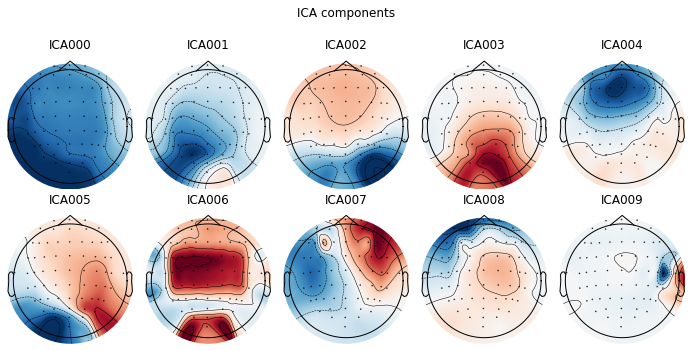

Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['action_feet', 'action_hand']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 721 original time points ...
0 bad epochs dropped


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


<Epochs |  30 events (all good), -0.5 - 4 sec, baseline off, ~10.7 MB, data loaded,
 'action_feet': 16
 'action_hand': 14>
[0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1]
(30, 64, 721)
(30,)


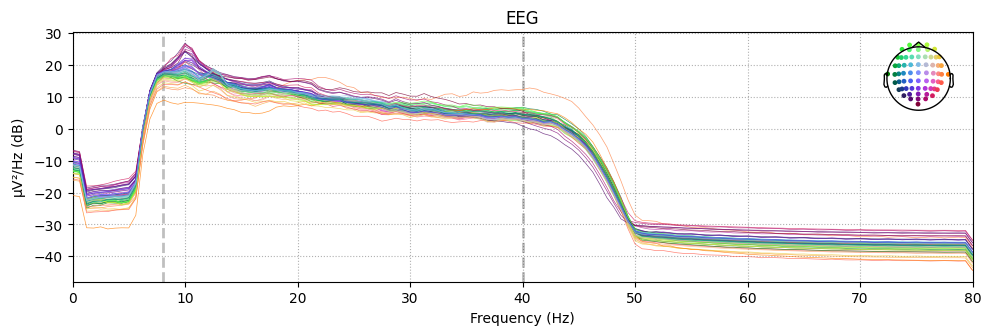

In [3]:
'''
https://github.com/mne-tools/mne-python/blob/main/mne/datasets/eegbci/eegbci.py#L110
=========  ===================================
run        task
=========  ===================================
1          Baseline, eyes open
2          Baseline, eyes closed
3, 7, 11   Motor execution: left vs right hand
4, 8, 12   Motor imagery: left vs right hand
5, 9, 13   Motor execution: hands vs feet
6, 10, 14  Motor imagery: hands vs feet
=========  ===================================
'''
raws = []
f = [5,9,13]
# ,6,10,14]
for i in f:
    print(i)
    current_file = files[i-1]
    r = read_raw_edf(current_file, preload=True, stim_channel='auto')
    events, _ = mne.events_from_annotations(r)
    if i in [5, 9, 13]:
        new_labels_events = {1:'rest', 2:'action_hand', 3:'action_feet'} # action
    else:
        new_labels_events = {1:'rest', 2:'imagine_hand', 3:'imagine_feet'} # imagine
    new_annot = mne.annotations_from_events(events=events, event_desc=new_labels_events, sfreq=r.info['sfreq'], orig_time=r.info['meas_date'])
    r.set_annotations(new_annot)
    raws.append(r)
    
raw_obj = concatenate_raws(raws)

original_raw = raw_obj.copy()

# filters
notch_freq = 60
original_raw.notch_filter(notch_freq, fir_design='firwin')

low_cutoff = 8
high_cutoff = 40
original_raw.filter(low_cutoff, high_cutoff, fir_design='firwin')

events, event_dict = mne.events_from_annotations(original_raw)
print(original_raw.info)
print(event_dict)
picks = mne.pick_types(original_raw.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')
eegbci.standardize(original_raw)
montage = mne.channels.make_standard_montage('standard_1005')
original_raw.set_montage(montage)

## ICA
n_components = 10
ica = ICA(n_components=n_components, random_state=97, max_iter=800)
ica.fit(original_raw)
ica.plot_components()
components_to_excludes, scores = ica.find_bads_eog(original_raw, ch_name='Fpz')
if components_to_excludes is not None and len(components_to_excludes) > 0:
    ica.plot_properties(original_raw, picks=components_to_excludes)
else:
    print("No components to exclude")
original_raw.compute_psd().plot()

event_id = {'action_hand': 1, 'action_feet': 2}
events, event_dict = mne.events_from_annotations(original_raw, event_id=event_id)
print(picks)


tmin = -0.5  # Time before event in seconds
tmax = 4.  # Time after event in seconds
epochs = mne.Epochs(original_raw, events, event_dict, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)
print(epochs)
print(epochs.events[:, -1] - 1)
X = epochs.get_data()
y = epochs.events[:, -1] - 1

print(X.shape)
print(y.shape)
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)



In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyCSP(BaseEstimator, TransformerMixin):
    def __init__(self, num_filters):
        self.num_filters = num_filters
        self.csp_filters_ = None
        
    def fit(self, X, y):
        class1_data = X[y == 0]
        class2_data = X[y == 1]

        class1_data_reshaped = class1_data.reshape(-1, class1_data.shape[-1])
        class2_data_reshaped = class2_data.reshape(-1, class2_data.shape[-1])
        # Calculate covariance matrices for each class
        cov1 = np.cov(class1_data_reshaped, rowvar=False)
        cov2 = np.cov(class2_data_reshaped, rowvar=False)
        
        # Compute whitening transformation matrices
        _, _, W1 = np.linalg.svd(cov1)
        _, _, W2 = np.linalg.svd(cov2)
        
        P = np.dot(W1.T, W2)
        
        # Perform eigenvalue decomposition on the CSP transformation matrix
        _, _, V = np.linalg.svd(P)
        
        # Select the top num_filters CSP filters
        self.csp_filters_ = V[:self.num_filters]
        
        return self
    
    def transform(self, X):
        # Apply CSP filters to the input data
        transformed_data = np.dot(X, self.csp_filters_.T)
        transformed_data = np.log(np.var(transformed_data, axis=2))
        return transformed_data

In [47]:
pipeline = Pipeline([
    ('csp', MyCSP(num_filters=5)),
    ('clf', LinearDiscriminantAnalysis(solver='svd', tol=0.0001))
])
scores = cross_val_score(pipeline, X, y, cv=shuffle_split, scoring='accuracy', n_jobs=-1)
scores.mean()

0.6333333333333333

## improve my csp

In [91]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.linalg import eigh
from sklearn.base import BaseEstimator, TransformerMixin


# class MyCSPf(BaseEstimator, TransformerMixin):
# 	def __init__(self, n_components=4):
# 		self.n_components = n_components

# 	def calc_covar(self, X, ddof=1):
# 		"""https://numpy.org/doc/stable/reference/generated/numpy.cov.html"""
# 		X -= np.average(X, axis=1)[:, None] # normalisation
# 		return np.squeeze(np.dot(X, X.T) / (X.shape[1] - ddof)) # actual cov calc
		
# 	def compute_cov_matrix(self, X, y):
# 		_, n_channels, _ = X.shape
# 		covs = []
# 		for this_class in self._classes:
# 			x_class = X[y == this_class]
# 			x_class = np.transpose(x_class, [1, 0, 2])
# 			x_class = x_class.reshape(n_channels, -1)
# 			# calc covar matrix for class
# 			covar_matrix = self.calc_covar(x_class)
# 			covs.append(covar_matrix)
# 		return np.stack(covs)

# 	def fit(self, X, y):
# 		# get classes
# 		self._classes = np.unique(y)
# 		# compute covs matrices
# 		covs = self.compute_cov_matrix(X, y)
# 		# decompose covs to eigen vectors and values (solve generalized eigenvalue problem)
# 		eigval, eigvec = eigh(covs[0], covs.sum(0))
# 		# sort components
# 		ix = np.argsort(np.abs(eigval - 0.5))[::-1]
# 		eigvec = eigvec[:, ix]
# 		# get filters
# 		self.filters_ = eigvec.T
# 		return self
    
# 	def transform(self, X):
# 		# apply filters
# 		pick_filters = self.filters_[:self.n_components]
# 		X = np.asarray([np.dot(pick_filters, epoch) for epoch in X])
# 		# compute features (mean power)
# 		X = (X ** 2).mean(axis=2)
# 		return X

# 	def fit_transform(self, X, y):
# 		self.fit(X, y)
# 		return self.transform(X)

class MyCSP(BaseEstimator, TransformerMixin):
    def __init__(self, n_components):
        self.n_components = n_components
        self.W_ = None
        self.mean_ = 0
        self.std_ = 0
    
    def _get_covariance_matrix(self, X, y):
        unique_classes = np.unique(y)

        class_covariances = []
        for unique_class in unique_classes:
            class_data = X[y == unique_class]
            _, n_channels, _ = class_data.shape
            class_data = np.transpose(class_data, [1,0,2])
            class_data = class_data.reshape(n_channels, -1)
            class_data = np.cov(class_data)
            class_covariances.append(class_data)

        return np.stack(class_covariances)
    
    def fit(self, X, y):
        covs = self._get_covariance_matrix(X, y)

        eigen_values, eigen_vectors = eigh(covs[0], covs.sum(axis=0))
        sort_idx = np.argsort(np.abs(eigen_values - 0.5))[::-1]
        eigen_values = eigen_values[sort_idx]
        eigen_vectors = eigen_vectors[:, sort_idx]
        
        W = eigen_vectors.T
        
        self.W_ = W[:self.n_components]

        X = np.asarray([np.dot(self.W_, epoch) for epoch in X])

        # compute features (mean power)
        X = (X**2).mean(axis=2)

        # To standardize features
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        return self
    
    def transform(self, X):
        X = np.asarray([np.dot(self.W_, epoch) for epoch in X])
        X = (X**2).mean(axis=2)
        X -= self.mean_
        X /= self.std_
        return X



In [92]:
X = epochs.get_data()
y = epochs.events[:, -1] - 1
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
print(X.shape)
print(y.shape)
pipeline = Pipeline([
    ('csp', MyCSP(4)),
    ('clf', LinearDiscriminantAnalysis(solver='svd', tol=0.0001))
])
scores = cross_val_score(pipeline, X, y, cv=shuffle_split, scoring='accuracy', n_jobs=-1)
scores.mean()

(30, 64, 721)
(30,)
0
0
0
0
0
1
1
1
1
1


0.8333333333333334

In [68]:
X = epochs.get_data()
y = epochs.events[:, -1] - 1
n_splits = 5
test_size = 0.2
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
print(X.shape)
print(y.shape)
pipeline = Pipeline([
    ('csp', SPoC(4)),
    ('clf', LinearDiscriminantAnalysis(solver='svd', tol=0.0001))
])
scores = cross_val_score(pipeline, X, y, cv=shuffle_split, scoring='accuracy', n_jobs=-1)
scores.mean()

(30, 64, 721)
(30,)
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 64 dim * 3.4e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
    Using tolerance 4.8e-05 (2.2e-16 eps * 64 dim * 3.4e+09  max singular value)
Estimating covariance using EMPIRICAL
Done.
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 64 dim * 3.3e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
    Using tolerance 5e-05 (2.2e-16 eps * 64 dim * 3.5e+09  max singular value)
Reducing data rank from 64 -> 64
Estimating covariance usin

0.8333333333333334